In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16

In [15]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
resized = 32    # 32, 64, 96, 128...

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train = tf.image.resize(x_train, (resized, resized))
x_test = tf.image.resize(x_test, (resized, resized))
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# Load the pre-trained VGG model
model = VGG16(weights='imagenet', include_top=False, input_shape=(resized, resized, 3))

List of the hidden layers

In [4]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [25]:
# Select a layer to visualize
layer_name = 'block1_pool'
selected_layer = model.get_layer(layer_name)

# Create a model that returns the activation output of the selected layer
intermediate_model = keras.models.Model(inputs=model.input, outputs=selected_layer.output)

# Get the activations for a test image
img = x_test[0]
activations = intermediate_model.predict(np.array([img]))

1/1 [==============================] - 1s 734ms/step


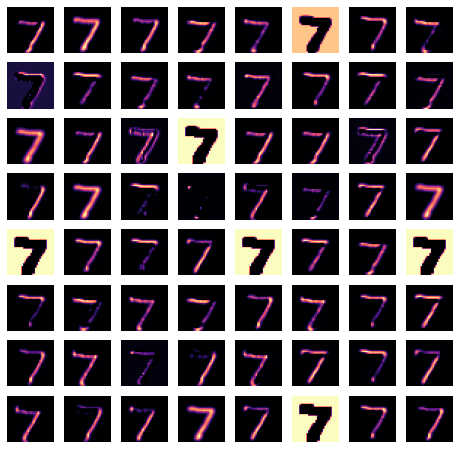

In [17]:
# Plot the activations
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='magma')
    plt.axis('off')
plt.show()

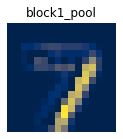

In [26]:
plt.figure(figsize=(2, 2))
plt.imshow(activations[0, :, :, 12], cmap='cividis')
plt.title(f"{layer_name}")
plt.axis('off')
plt.show()